## Práctica Adicional

La tarea de hoy es bastante simple. Al haber visto bastante contenido en clase sus cabezas necesitan descansar un poco, procesar y **REPASAR**. **NO**, repito, **NO** vamos a revisar la tarea en el code review, ya que es más una manera de ustedes seguir con el contenido de la clase más que una tarea nueva. Las preguntas pertinentes deben referise al canal de Slack del grupo. Se les recomienda igualmente trabajar con sus compañeros para resolver las dudas, ya que dentro de poco entraran a la parte de Labs.

La tarea implica cargar el archivo `data_regression.csv` y fittear un modelo lineal simple usando cada variable $X$ primero, y después un modelo linear múltiple usando $X1$, $X2$ y $X3$ al mismo tiempo.

1- ¿Qué diferencias existe entre la relación de cada variable de input con el output ($y$)?

2- ¿Cómo es la correlación entre las variables regresoras y el output?

3- ¿Qué pueden notar cuando realizan la regresión múltiple?¿Los resultados difieren de lo anterior?

4- Calcule las medidas MSE y Coeficiente R2 para evaluar cada modelo.

In [1]:
import pandas as pd

In [9]:
df = pd.read_csv('data_regression.csv',  index_col=0)

In [10]:
df

,X1,X2,X3,y
0,-10.000000,0.000000,-5.000000,10.958481
1,-9.986658,0.014676,-4.996664,8.991666
2,-9.973316,0.029353,-4.993329,10.398068
3,-9.959973,0.044029,-4.989993,11.759961
4,-9.946631,0.058706,-4.986658,10.177304
...,...,...,...,...
1495,9.946631,21.941294,-0.013342,1.208277
1496,9.959973,21.955971,-0.010007,1.814573
1497,9.973316,21.970647,-0.006671,0.791170
1498,9.986658,21.985324,-0.003336,1.207057


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1500 non-null   float64
 1   X2      1500 non-null   float64
 2   X3      1500 non-null   float64
 3   y       1500 non-null   float64
dtypes: float64(4)
memory usage: 58.6 KB


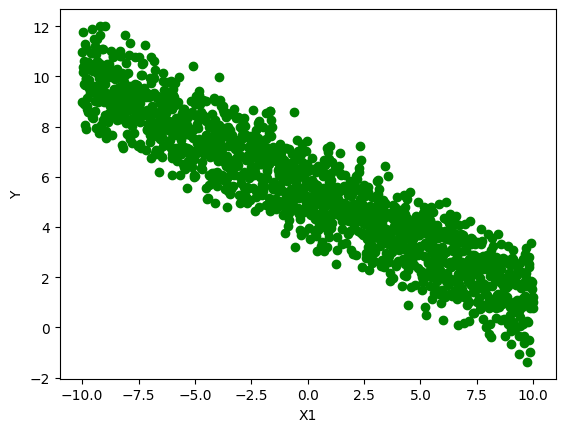

In [20]:
#Gráfico tomando las variable X1 y Y


import matplotlib.pyplot as plt

plt.ylabel("Y")
plt.xlabel("X1")
plt.scatter(df['X1'], df['y'], color='green')
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [26]:
regresion=linear_model.LinearRegression()

In [29]:
#Se transforman los datos en un vector

X1= df['X1'].values.reshape((-1,1))

In [34]:
#Se entrena el modelo

modelo1=regresion.fit(X1, df['y'])

In [31]:
print('La pendiente obtenida con Sklearn es :', modelo1.coef_)
print('La ordenada al origen obtenida con Sklearn es:', modelo1.intercept_)

La pendiente obtenida con Sklearn es : [-0.4478604]
La ordenada al origen obtenida con Sklearn es: 5.488195226319328


In [32]:
y_pred = modelo1.predict(X1)

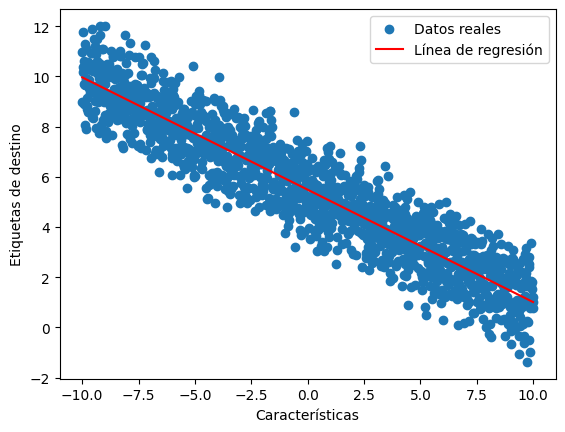

In [33]:
plt.scatter(X1, df['y'], label='Datos reales')
plt.plot(X1, y_pred, color='red', label='Línea de regresión')
plt.xlabel('Características')
plt.ylabel('Etiquetas de destino')
plt.legend()
plt.show()

In [106]:
#Evaluación del error

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['y'], y_pred)
mse

1.0005408287539395

In [107]:
from sklearn.metrics import r2_score
r2 = r2_score(df['y'], y_pred)
r2

0.8699823970946388

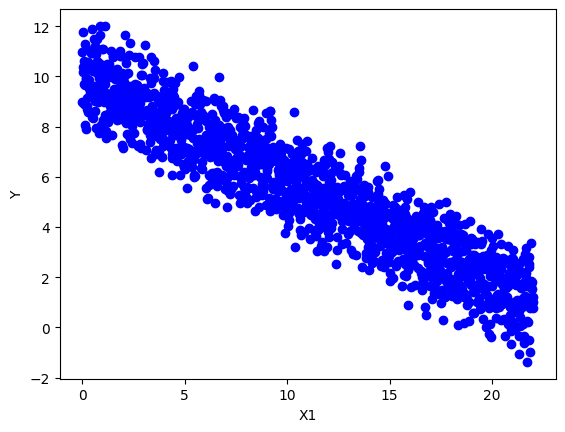

In [22]:
#Gráfico tomando las variable X2 y Y


import matplotlib.pyplot as plt

plt.ylabel("Y")
plt.xlabel("X1")
plt.scatter(df['X2'], df['y'], color='blue')
plt.show()

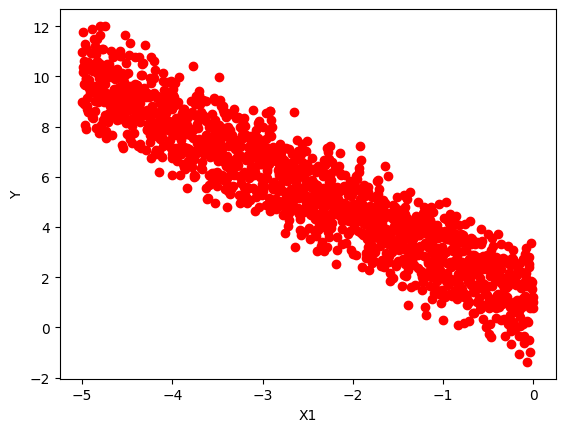

In [23]:
#Gráfico tomando las variable X3 y Y


import matplotlib.pyplot as plt

plt.ylabel("Y")
plt.xlabel("X1")
plt.scatter(df['X3'], df['y'], color='red')
plt.show()

In [39]:
#X2=df['X2'].values.reshape((-1,1))
#X3=df['X3'].values.reshape((-1,1))

In [40]:
from sklearn.model_selection import train_test_split

In [98]:
X = df[['X1','X2','X3']]
y = df[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1200, 3) (1200, 1) (300, 3) (300, 1)


In [99]:
X

,X1,X2,X3
0,-10.000000,0.000000,-5.000000
1,-9.986658,0.014676,-4.996664
2,-9.973316,0.029353,-4.993329
3,-9.959973,0.044029,-4.989993
4,-9.946631,0.058706,-4.986658
...,...,...,...
1495,9.946631,21.941294,-0.013342
1496,9.959973,21.955971,-0.010007
1497,9.973316,21.970647,-0.006671
1498,9.986658,21.985324,-0.003336


In [100]:
# Instanciamos nuestra regresión lineal y la entrenamos

modelo_multiple = LinearRegression()

modelo_multiple.fit(X_train, y_train)

LinearRegression()

In [82]:
y_train

485     7.846704
527     6.830511
199     9.193092
889     4.565765
844     5.008155
          ...   
1130    1.475072
1294    1.698455
860     4.975003
1459    0.859294
1126    2.258288
Name: y, Length: 1050, dtype: float64

In [90]:
modelo5=regresion.fit(X, y)
modelo5

LinearRegression()

In [91]:
print('Las pendientes del modelo de regresión lineal son:', modelo5.coef_)
print('La ordenada al origen del modelo de regresión lineal es:', modelo5.intercept_)

Las pendientes del modelo de regresión lineal son: [[-0.19707828 -0.21678611 -0.04926957]]
La ordenada al origen del modelo de regresión lineal es: [7.74966852]


In [101]:
print('Las pendientes del modelo de regresión lineal son:', modelo_multiple.coef_)
print('La ordenada al origen del modelo de regresión lineal es:', modelo_multiple.intercept_)

Las pendientes del modelo de regresión lineal son: [[ 2.36251452e+12 -2.12831941e+12 -8.54526753e+10]]
La ordenada al origen del modelo de regresión lineal es: [2.31978818e+13]


In [102]:
y_pred_multiple = modelo_multiple.predict(X)

In [103]:
#Evaluación del error

from sklearn.metrics import mean_squared_error

y_pred_multiple = modelo_multiple.predict(X_test)  # Realiza las predicciones con tu modelo

# Calcula el MSE
mse1 = mean_squared_error(y_test, y_pred_multiple)
mse1

1.0485256234023181

In [104]:
y_pred_multiple2 = modelo_multiple.predict(X_train)  # Realiza las predicciones con tu modelo

In [105]:
r2_multiple = r2_score(y_train, y_pred_multiple2)
r2_multiple

0.8730505593967746